

## <center> Polytechnique Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8008 – Prétraitement de données <br> . <br> TP2  - Transformation, distribution et statistiques descriptives<br>  Hiver 2025 <br> . <br>  Janvier 2025 </center>

## Introduction

Le TD2 porte sur la transformation, la distribution et les statistiques descriptives. **Nous survolons l'utilisation de fonctions de base de Pandas et de l'analyse de données numériques.** Les données du fichier *Alzheimer_s_Disease_and_Healthy_Aging_Data.csv* sont des données publiques provenant d'enquêtes sur le vieillissement et la santé, faites par le [Département de la Santé et des Services sociaux des États-Unis](https://catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data). Contrairement aux données du TP1 qui avaient été traitées au préalable, celles utilisées pour ce TP ne le sont pas. Vous devrez traiter les données brutes pour obtenir une version plus condensée, facilitant l'analyse des tendances et des sous-groupes de population.

Les champs principaux du fichier de données **Alzheimer_s_Disease_and_Healthy_Aging_Data.csv** sont les suivants :

- **YearStart/YearEnd** : années de début et de fin des données
- **LocationAbbr** : abréviation du lieu
- **Class** : catégorie des données (ex. : Santé mentale)
- **Topic** : sujet spécifique (ex. : détresse mentale fréquente)
- **Question** : question étudiée
- **Data_Value_Unit** : unité de mesure des données (ex. : pourcentage)
- **Data_Value** : valeur des données collectées
- **StratificationCategory1 / Stratification1** : catégorie et détail de la première stratification (ex. : âge, genre)
- **StratificationCategory2 / Stratification2** : catégorie et détail de la deuxième stratification (ex. : race, ethnie)

Ces données servent de base pour explorer les tendances, identifier des corrélations, et mieux comprendre les facteurs liés aux maladies neurodégénératives et à la santé mentale des populations vieillissantes. Votre objectif dans ce TP sera de préparer ces données pour qu'elles soient prêtes pour une analyse approfondie.

Voici les librairies python qui sera à utiliser pour ce TP :
- [pandas](https://pandas.pydata.org/docs/user_guide/index.html)
- [numpy](https://numpy.org/doc/stable/user/basics.html)
- [matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html)

**À noter qu'au niveau de chaque question, il est recommandé de copier le DataFrame obtenu à la question précédente dans un nouveau DataFrame.**

*Veuillez vous référer à l'énoncé PDF de ce TP pour voir la sortie attendue.*


In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('/content/drive/MyDrive/INF8008/Hiver 2025/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')
df

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS



### A)
Vous remarquerez que ce jeu de données est assez large, avec 284142 lignes et 31 colonnes.

Avec des ensembles de données de cette taille, on peut souvent trouver des défauts, comme des doublons de lignes.
Vérifiez donc s'il existe des valeurs en double dans le DataFrame. <b>(2 points)</b>

In [8]:
#TODO:
duplicate_rows = df.duplicated()

if True in duplicate_rows.values:
    print("Il existe des valeurs en double.")
else:
    print("Il n'existe pas de valeurs en double.")


Il n'existe pas de valeurs en double.


### B)
Il est possible d'extraire la durée du sondage en soustrayant l'année de début de l'année de fin. Utilisez lambda, ainsi que cette soustraction, pour garder les lignes avec une durée de sondage de moins d'1 an. <b>(3 points)</b>

In [9]:
#TODO:
df['Year_Duration'] = df.apply(lambda row: row['YearEnd'] - row['YearStart'], axis=1)
df = df[df["Year_Duration"] < 1]
df


,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,Year_Duration
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA,0
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN,0
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK,0
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK,0
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK,0
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS,0
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN,0
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS,0


### C)
Maintenant que cette étape est faite, les colonnes YearStart et YearEnd contiennent la même information. Renommez une des deux colonnes à `Year`, et supprimez l'autre. <b>(2 points)</b>

In [10]:
df = df.rename({"YearStart": "Year"}, axis=1)
df=df.drop(["YearEnd"], axis = 1)


### D)
Certaines colonnes contiennent des données redondantes ou inutiles pour notre analyse. Éliminez toutes les colonnes inutiles en ne conservant que celles mentionnées dans l'introduction. Combien de colonnes reste-t-il ? <b>(2 points)</b>

In [11]:
#TODO:

df = df.loc[:, ["Year", "LocationAbbr", "Class", "Topic", "Question", "Data_Value_Unit", "Data_Value", "Stratification1", "Stratification2", "StratificationCategory1", "StratificationCategory2"]]
print(" Il existe" , df.columns.shape[0], "colonnes.")

 Il existe 11 colonnes.


### E)

Comme vu dans le module 1, le prétraitement des données consiste à gérer les défauts des données collectées, comme les valeurs nulles. La colonne `Data_Value` est importante pour notre analyse.

Vérifiez donc s'il existe des données manquantes dans la colonne `Data_Value`. Quel est le pourcentage de valeurs manquantes ? <b>(3 points)</b>

In [12]:

cc = df['Data_Value'].count() == len(df)

if not cc:  # cc will be False if there are missing values
    print("Il existe des données manquantes.")
    print("Le pourcentage de données manquantes est de", (1 - df['Data_Value'].count() / len(df)) * 100, "%")
else:
    print("Il n'existe pas de données manquantes.")


Il existe des données manquantes.
Le pourcentage de données manquantes est de 32.117898290533 %



### F)
Deux façons de traiter les données manquantes: les remplacer par la valeur médiane ou les éliminer complètement.

Il n’existe pas de solution **unique ou meilleure**. Tout dépend de l’analyse effectuée. Il est essentiel d’examiner les effets de chacun de ces choix sur l’analyse ultérieure. C’est pourquoi, dans ce TP, nous essayerons les deux méthodes.

Vous devez donc:

1. Créez deux copies de l'ensemble de données.
2. Supprimez les valeurs manquantes d'une des copies.
3. Remplacez les valeurs manquantes d'une autre copie par la médiane.

Affichez les nouveaux dataframes. Vous devriez avoir autour de 186595 lignes pour l'un et 274881 lignes pour l'autre. <b>(4 points)</b>

In [13]:
df1 = df.copy()
df2 = df.copy()
df1["Data_Value"] = df1["Data_Value"].fillna(df["Data_Value"].median())
df2 = df2.dropna(subset=["Data_Value"])
print(df1)
print(df2)


        Year LocationAbbr                                Class  \
0       2022           PA                        Mental Health   
1       2022           SD                        Mental Health   
2       2022           ID                        Mental Health   
3       2022           MD                        Mental Health   
4       2022           WI                        Mental Health   
...      ...          ...                                  ...   
284137  2016           WI              Screenings and Vaccines   
284138  2017           WY                       Overall Health   
284139  2015           WY                    Cognitive Decline   
284140  2019           WV                       Overall Health   
284141  2015           WY  Nutrition/Physical Activity/Obesity   

                                                    Topic  \
0                                Frequent mental distress   
1                                Frequent mental distress   
2                       

**Note :** Pour la suite du travail, chaque étape devra être réalisée sur les deux copies de l'ensemble de données.

### G)

Plusieurs classes existent. On va évaluer la santé mentale "Mental Health".
Filtrez les données de la colonne "class" pour la valeur "Mental Health", puis déterminez la moyenne de `Data_Value` par `Year` et `Topic`. <b>(2 points)</b>

In [14]:
df1 = df1[df1["Class"] == "Mental Health"]
df2 = df2[df2["Class"] == "Mental Health"]
grouped_data1 = df1.groupby(['Topic', 'Year'])['Data_Value'].mean().reset_index()
grouped_data2 = df2.groupby(['Topic', 'Year'])['Data_Value'].mean().reset_index()


### H)
Il est temps de comparer la suppression des données manquantes vs leur remplacement par la médiane. Pour cela, affichez les valeurs moyennes de `Data_Value` par année, pour chaque groupe et chaque topic. <b>(3 points)</b>

In [15]:
import matplotlib.pyplot as plt

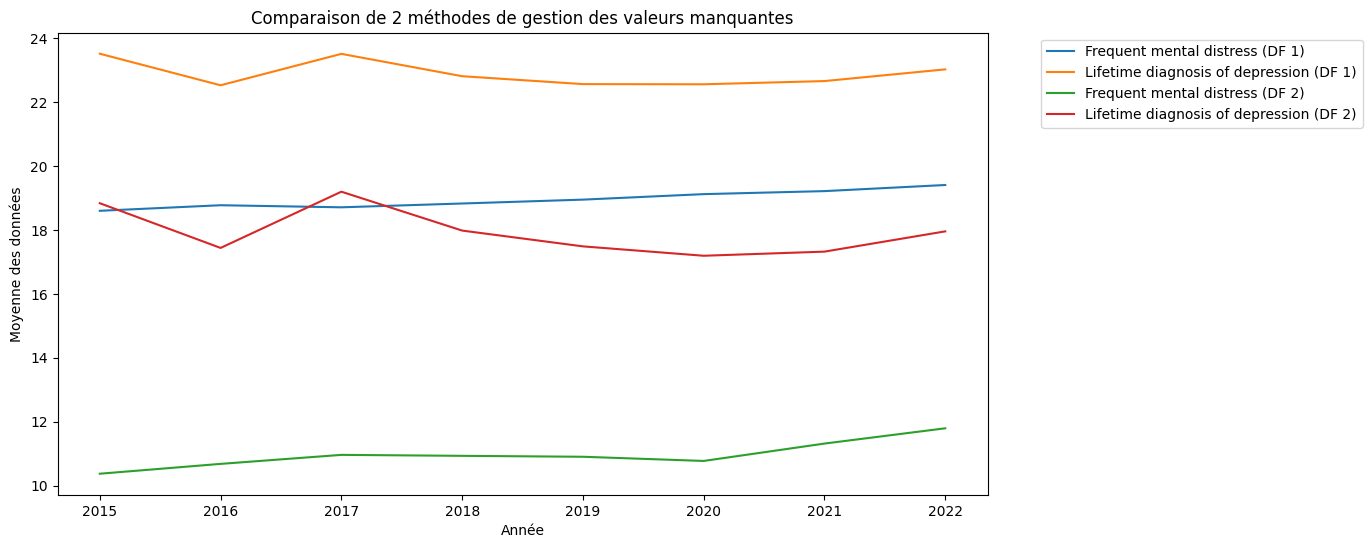

In [16]:
#DF 1: remplacement de NA avec médiane
plt.figure(figsize=(12, 6))
for topic in grouped_data1['Topic'].unique():
    subset = grouped_data1[grouped_data1['Topic'] == topic]
    plt.plot(subset['Year'], subset['Data_Value'], label=f'{topic} (DF 1)')

# DF 2: élimination de NA
for topic in grouped_data2['Topic'].unique():
    subset = grouped_data2[grouped_data2['Topic'] == topic]
    plt.plot(subset['Year'], subset['Data_Value'], label=f'{topic} (DF 2)')

plt.title('Comparaison de 2 méthodes de gestion des valeurs manquantes')
plt.xlabel('Année')
plt.ylabel('Moyenne des données')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## 3. LIVRABLES
Vous devez remettre sur Moodle un fichier compressé .zip contenant :

1) Le code : Un Jupyter notebook en Python qui contient le code tel implanté avec les librairies minimales demandées pour ce TP (Python, Pandas, Matplotlib). Le code doit être exécutable sans erreur et accompagné des commentaires appropriés dans le notebook de manière. Tous vos résultats doivent être reproductibles avec le code dans le notebook. *Attention, en aucun cas votre code ne doit avoir été copié de d'ailleurs.*

2) Un fichier pdf représentant votre notebook complètement exécuté sous format pdf (obtenu via latex ou imprimé en pdf avec le navigateur). Assurez-vous que le PDF est entièrement lisible. [Tutoriel youtube](https://www.youtube.com/watch?v=-Ti9Mm21uVc)

ATTENTION: assurez-vous que votre fichier compressé .zip ne dépasse pas la taille limite acceptée sur Moodle.


__ÉVALUATION__ <br>
Votre TP sera évalué sur les points suivants :

__Critères :__
1. Implantation correcte et efficace
2. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.) <b>(1 point)</b>
3. Réponses correctes/sensées aux questions de réflexion ou d'analyse

__CODE D’HONNEUR__
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. Vous __ne pouvez pas__ soumettre un code, écrit par quelqu’un d’autre. Dans le cas contraire, cela sera considéré comme du plagiat.
- __Règle 2__: Vous êtes libres de discuter avec d'autres équipes. Cependant, vous ne pouvez en aucun cas incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.

### Conversion en PDF sur Google Colab

In [ ]:
%%capture
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Assurez vous d'avoir téléchargé le TP complété en notebook sur votre ordinateur, puis importé ce fichier dans le répertoire "content" avant de rouler la ligne suivante.

In [ ]:
!jupyter nbconvert --to pdf /content/TP1.ipynb